In [1]:
import re
import logging
import json
import urllib
import yaml
import pickle
import datetime
from IPython import get_ipython
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import scipy.stats as ss
from scipy.optimize import curve_fit
%matplotlib inline
pylab.rcParams['figure.figsize'] = [17, 10]
matplotlib.style.use('ggplot')


In [2]:
%run data_base.py

In [3]:
clusters_data = yaml.safe_load(open('lw_survey_clustered_1.yaml'))


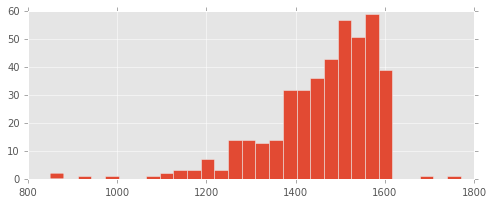

In [4]:
data['SAT'].hist(bins=30, figsize=(8, 3))  # some "general population" data here would be relevant

1

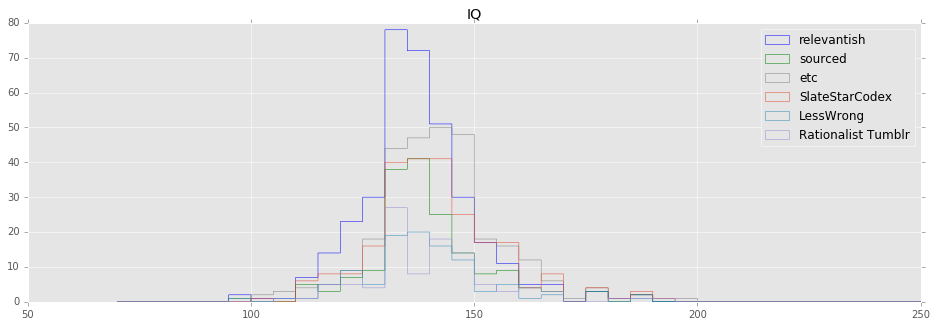

In [79]:
min_iq = 70
max_iq = 250
hkwa1 = dict(
    figsize=(16, 5),
    bins=list(np.arange(min_iq, max_iq + 0.1, 5)),
    histtype='step')
iq_sane = (data['IQ'] < max_iq) & (data['IQ'] > min_iq)
iq_relevantish = iq_sane & (data['IQAge'] < 45) & (data['IQAge'] > 15)
iq_sourced = (~data['IQType'].isnull())

here_data = [
    dict(series=data[iq_relevantish]['IQ'], label='relevantish', color='blue'),
    dict(series=data[iq_relevantish & iq_sourced]['IQ'], label='sourced', color='green'),
    dict(series=data[~iq_relevantish & iq_sane]['IQ'], label='etc', color='gray'),
]

communities = [key for key, info in column_infos.items() if info['key'] == 'ActiveMemberships']
for community in communities:
    series = data[(data[community] == 'Yes') & iq_sane]['IQ']
    if len(series) < 100:
        continue
    here_data.append(dict(series=series, label=column_infos[community]['label']))

for info in here_data:
    kwa = dict(hkwa1)
    kwa.update(info)
    kwa.pop('series')
    info['series'].hist(**kwa)


plt.title("IQ")
plt.legend([info['label'] for info in here_data])
# plt.xticks(np.arange(min_iq, max_iq, 10), rotation=-60)
1